# Cifar-10 images


### Challenge
Use Keras to build a neural network.  Pick an abstract type, possibly non-numeric, and use Keras to make 5 implementations of the network.
- Compare computational complexity and accuracy
- Samples in the thousands
- Take advantage of feature extraction and supervised capabilities

### References:
Display cifar-10 images: <br>
https://stackoverflow.com/questions/35995999/why-cifar-10-images-are-not-displayed-properly-using-matplotlib

In [2]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import os

import tensorflow as tf
import keras

from keras.datasets import cifar10

# Import Components for model building
# Import various components for model building
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.layers import LSTM, Input, TimeDistributed
from keras.models import Model
from keras.optimizers import RMSprop

# Import the backend
from keras import backend as K

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 58s 0us/step


In [5]:
x_train.shape

(50000, 32, 32, 3)

In [20]:
# One pixel
x_train[2, 1, 1, :]

array([255, 255, 255], dtype=uint8)

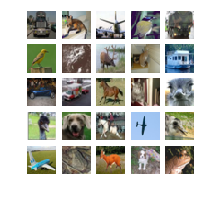

In [10]:
# Display a sampling of images
#Examples of cifar dataset
X_train_image = x_train.astype("uint8")

#Visualizing CIFAR 10
fig, axes1 = plt.subplots(5,5,figsize=(3,3))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(X_train_image)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X_train_image[i:i+1][0])

### Multi Layer Perceptron

In [21]:
# Change Shape
x_train = x_train.reshape(50000, 3072)
x_test = x_test.reshape(10000, 3072)

# Convert to float32 for type consistency
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize values to 1 from 0 to 255 (256 values of pixels)
x_train /= 255
x_test /= 255

# Print sample sizes
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices
# instead of one column with 10 values, create 10 binary columns
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

50000 train samples
10000 test samples


In [25]:
# Start with a simple sequential model
model = Sequential()

# Add dense layers to create a fully connected MLP
# Note that we specify an input shape for the first layer, but only the
# first layer
# Relu is the activation function
model.add(Dense(64, activation='relu', input_shape=(3072,)))
# Dropout layers remove features and fight overfitting
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
# End with a number of units equal to the number of classes we have
model.add(Dense(10, activation='softmax'))

model.summary()

# Compile the model to put it all together
model.compile(loss='categorical_crossentropy', 
              optimizer=RMSprop(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=20,
                    verbose=1,
                    validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 64)                196672    
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                4160      
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 10)                650       
Total params: 201,482
Trainable params: 201,482
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 2s 42us/step - loss: 2.0619 

## Convolutional Neural Network 

In [28]:
# input image dimensions, from our data
img_rows, img_cols = 32, 32
num_classes = 10

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


# Building the Model
model = Sequential()
# First convolutional layer, note the specification of shape
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 116s 2ms/step - loss: 1.8202 - acc: 0.3418 - val_loss: 1.3467 - val_acc: 0.5154
Epoch 2/10
50000/50000 [==============================] - 207s 4ms/step - loss: 1.3756 - acc: 0.5125 - val_loss: 1.1745 - val_acc: 0.5886
Epoch 3/10
50000/50000 [==============================] - 224s 4ms/step - loss: 1.1861 - acc: 0.5828 - val_loss: 1.0642 - val_acc: 0.6234
Epoch 4/10
50000/50000 [==============================] - 214s 4ms/step - loss: 1.0732 - acc: 0.6259 - val_loss: 1.0838 - val_acc: 0.6171
Epoch 5/10
50000/50000 [==============================] - 213s 4ms/step - loss: 0.9920 - acc: 0.6542 - val_loss: 0.9501 - val_acc: 0.6686
Epoch 6/10
50000/50000 [==============================] - 216s 4ms/step - loss: 0.9245 - acc: 0.6761 - val_loss: 0.9347 - val_acc: 0.6748
Epoch 7/10
50000/50000 [=========================

## Hierarchical Recurrent Neural Network


In [29]:
# Training parameters
batch_size = 64
num_classes = 10
epochs = 10

# Embedding Dimensions
row_hidden = 32
col_hidden = 32

# The data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Reshapes data to 4d for Hierarchical RNN
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Converts class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

row, col, pixel = x_train.shape[1:]

# 4D input
x = Input(shape=(row, col, pixel))

# Encodes a row of pixels using TimeDistributed Wrapper
encoded_rows = TimeDistributed(LSTM(row_hidden))(x)

# Encodes columns of encoded rows
encoded_columns = LSTM(col_hidden)(encoded_rows)

# Final predictions and model
prediction = Dense(num_classes, activation='softmax')(encoded_columns)
model = Model(x, prediction)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Training
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

# Evaluation
scores = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 130s 3ms/step - loss: 2.0213 - acc: 0.2560 - val_loss: 1.9632 - val_acc: 0.2979
Epoch 2/3
50000/50000 [==============================] - 127s 3ms/step - loss: 1.8177 - acc: 0.3380 - val_loss: 1.7745 - val_acc: 0.3591
Epoch 3/3
50000/50000 [==============================] - 130s 3ms/step - loss: 1.7161 - acc: 0.3720 - val_loss: 1.6454 - val_acc: 0.4032
Test loss: 1.6454382081985475
Test accuracy: 0.4032


Increase number of embedded dimensions and epochs.

In [30]:
# Training parameters
batch_size = 64
num_classes = 10
epochs = 10

# Embedding Dimensions
row_hidden = 64
col_hidden = 64

# The data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Reshapes data to 4d for Hierarchical RNN
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Converts class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

row, col, pixel = x_train.shape[1:]

# 4D input
x = Input(shape=(row, col, pixel))

# Encodes a row of pixels using TimeDistributed Wrapper
encoded_rows = TimeDistributed(LSTM(row_hidden))(x)

# Encodes columns of encoded rows
encoded_columns = LSTM(col_hidden)(encoded_rows)

# Final predictions and model
prediction = Dense(num_classes, activation='softmax')(encoded_columns)
model = Model(x, prediction)
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Training
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

# Evaluation
scores = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 260s 5ms/step - loss: 1.9785 - acc: 0.2763 - val_loss: 1.8785 - val_acc: 0.3196
Epoch 2/10
50000/50000 [==============================] - 246s 5ms/step - loss: 1.7465 - acc: 0.3631 - val_loss: 1.7347 - val_acc: 0.3704
Epoch 3/10
50000/50000 [==============================] - 255s 5ms/step - loss: 1.6315 - acc: 0.4079 - val_loss: 1.6117 - val_acc: 0.4173
Epoch 4/10
50000/50000 [==============================] - 255s 5ms/step - loss: 1.5548 - acc: 0.4391 - val_loss: 1.5379 - val_acc: 0.4423
Epoch 5/10
50000/50000 [==============================] - 232s 5ms/step - loss: 1.4901 - acc: 0.4610 - val_loss: 1.4631 - val_acc: 0.4707
Epoch 6/10
50000/50000 [==============================] - 221s 4ms/step - loss: 1.4377 - acc: 0.4804 - val_loss: 1.4582 - val_acc: 0.4740
Epoch 7/10
50000/50000 [=========================